<a href="https://colab.research.google.com/github/wieeem/MNIST_ANN-from-scratch/blob/main/Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from matplotlib import pyplot

## **Mount Drive**

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
cd /content/drive/My\ Drive/Colab\ notebook/TP_DL

/content/drive/My Drive/Colab notebook/TP_DL


## **Keras Library**

The Keras library includes several pretrained  neural network models on ImageNet classification dataset.
  
The most  popular models are AlexNet, VGG, VGG, Resnet, Inception ...

ImageNet is a large database or dataset of over 14 million images organized into 21841 categories or classes.


In [27]:
# load vgg model
from keras.applications import InceptionV3
model1 = InceptionV3(weights='imagenet')

In [33]:
#Prints  convolutional layer details including the layer name and the shape of the filters in each layer and the size of output feature maps.
def layers_info(model):
  for layer in model.layers:
	  # check for convolutional layer
	  if 'conv' not in layer.name:
		  continue
	  # get filter weights
	#  filters, biases = layer.get_weights()
	  print(layer.name,layer.output.shape)
   
   

In [34]:
layers_info(model1)

conv2d_94 (None, 149, 149, 32)
conv2d_95 (None, 147, 147, 32)
conv2d_96 (None, 147, 147, 64)
conv2d_97 (None, 73, 73, 80)
conv2d_98 (None, 71, 71, 192)
conv2d_102 (None, 35, 35, 64)
conv2d_100 (None, 35, 35, 48)
conv2d_103 (None, 35, 35, 96)
conv2d_99 (None, 35, 35, 64)
conv2d_101 (None, 35, 35, 64)
conv2d_104 (None, 35, 35, 96)
conv2d_105 (None, 35, 35, 32)
conv2d_109 (None, 35, 35, 64)
conv2d_107 (None, 35, 35, 48)
conv2d_110 (None, 35, 35, 96)
conv2d_106 (None, 35, 35, 64)
conv2d_108 (None, 35, 35, 64)
conv2d_111 (None, 35, 35, 96)
conv2d_112 (None, 35, 35, 64)
conv2d_116 (None, 35, 35, 64)
conv2d_114 (None, 35, 35, 48)
conv2d_117 (None, 35, 35, 96)
conv2d_113 (None, 35, 35, 64)
conv2d_115 (None, 35, 35, 64)
conv2d_118 (None, 35, 35, 96)
conv2d_119 (None, 35, 35, 64)
conv2d_121 (None, 35, 35, 64)
conv2d_122 (None, 35, 35, 96)
conv2d_120 (None, 17, 17, 384)
conv2d_123 (None, 17, 17, 96)
conv2d_128 (None, 17, 17, 128)
conv2d_129 (None, 17, 17, 128)
conv2d_125 (None, 17, 17, 128)
conv2

In [35]:
#The network has been trained on (224, 224) RGB images
model1.input_shape

(None, 299, 299, 3)

(299, 299, 3)

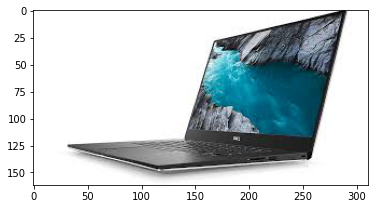

In [43]:
from keras.applications.inception_v3 import preprocess_input
img =Image.open('laptop.jpg')
plt.imshow(img)
img = img.resize ((299,299)) 
x = np.asanyarray(img) 
x.shape

In [44]:
# It's very important to apply  the preprocessing functions that were used when training the model.
from keras.applications.inception_v3 import preprocess_input
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
x.shape

(1, 299, 299, 3)

 x is now compatible with the input shape of the neural network, let's make a prediction.

In [45]:
preds = model1.predict(x)
print(preds)
preds.shape

[[4.16326802e-04 1.10516841e-04 1.53303903e-04 9.81046760e-05
  2.42744602e-04 1.78970964e-04 1.47166691e-04 1.07841988e-04
  1.81843105e-04 1.18770411e-04 1.52561406e-04 1.30407454e-04
  1.49290194e-04 1.15832154e-04 1.87367259e-04 2.05376447e-04
  1.73380104e-04 1.48991792e-04 1.45190090e-04 1.71050109e-04
  6.96053903e-05 1.07750611e-03 2.15455904e-04 1.21073106e-04
  4.74597560e-04 1.53693894e-04 1.41484430e-04 1.46813574e-04
  2.22949311e-04 1.36569564e-04 3.67973058e-04 1.79043025e-04
  1.16258445e-04 1.02479593e-04 1.34097791e-04 1.34036556e-04
  7.30717002e-05 2.23823430e-04 2.29298457e-04 1.42764329e-04
  3.86142347e-04 1.26644765e-04 1.66428392e-04 2.75123370e-04
  1.62789511e-04 1.76594636e-04 2.80524138e-04 1.75918234e-04
  1.29803084e-04 1.23202059e-04 1.39892771e-04 1.67061764e-04
  7.98193287e-05 1.20626632e-04 1.69242499e-04 1.53741246e-04
  2.20034810e-04 1.81291267e-04 2.82780151e-04 2.91375356e-04
  1.43271973e-04 2.06656259e-04 1.28208514e-04 1.68410275e-04
  1.3392

(1, 1000)

**Decoding the Prediction Probabilities**

In [47]:
from keras.applications.inception_v3 import decode_predictions
decode_predictions(preds, top=5)

[[('n03832673', 'notebook', 0.6598741),
  ('n03642806', 'laptop', 0.053928845),
  ('n03180011', 'desktop_computer', 0.021236869),
  ('n04264628', 'space_bar', 0.018484984),
  ('n04152593', 'screen', 0.013076838)]]

In [48]:
print('Predicted image labels:')
class_names, confidences = [], []
for class_id, class_name, confidence in decode_predictions(preds, top=5)[0]:
    print(class_name, confidence)

Predicted image labels:
notebook 0.6598741
laptop 0.053928845
desktop_computer 0.021236869
space_bar 0.018484984
screen 0.013076838


In [ ]:
from tensorflow.keras import layers


# TODO :
1. To visualize the architecture of  the CNN model
2. Call the defined  function: layers_info  to print a list of layer details including the layer name, the shape of the filters in the layer and 
3. To use other pretrained models:  InceptionV3 and ResNet50 and to compare the results 
4. To test other images